Topic:        Challenge Set 1  
Subject:      Explore MTA turnstile data  
Date:         01/14/2018  
Name:         Adam Ariel  

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import urllib
from collections import defaultdict
import datetime
import dateutil.parser

In [2]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt

In [3]:

mtadata = open('turnstile_150627.txt','r')
mtadata=mtadata.readlines()
mtadata.pop(0)
mtadatab = open('turnstile_150620.txt','r')
mtadatab=mtadatab.readlines()
mtadatab.pop(0)
mtadata=mtadatab+mtadata

In [4]:
d=defaultdict(list)
for i in mtadata:
    i = i.split(',')
    a=(i[0],i[1],i[2],i[3])
    b=[i[4],i[5],i[6],i[7],i[8],i[9],i[10].strip()]
    d[a] = d[a]+[b]

In [5]:
d[('A002','R051','02-00-00','LEXINGTON AVE')][15]

['NQR456',
 'BMT',
 '06/15/2015',
 '12:00:00',
 'REGULAR',
 '0005183859',
 '0001754116']

**Problem 2**

In [6]:
dd=defaultdict(list)
for i in mtadata:
    i = i.split(',')
    a=(i[0],i[1],i[2],i[3])
    b=[dateutil.parser.parse(i[6]+' '+i[7]),i[9]]
    dd[a] = dd[a]+[b]

In [7]:
dd[('A002','R051','02-00-00','LEXINGTON AVE')]

[[datetime.datetime(2015, 6, 13, 0, 0), '0005181929'],
 [datetime.datetime(2015, 6, 13, 4, 0), '0005181959'],
 [datetime.datetime(2015, 6, 13, 8, 0), '0005181981'],
 [datetime.datetime(2015, 6, 13, 12, 0), '0005182091'],
 [datetime.datetime(2015, 6, 13, 16, 0), '0005182349'],
 [datetime.datetime(2015, 6, 13, 20, 0), '0005182661'],
 [datetime.datetime(2015, 6, 14, 0, 0), '0005182855'],
 [datetime.datetime(2015, 6, 14, 4, 0), '0005182894'],
 [datetime.datetime(2015, 6, 14, 8, 0), '0005182910'],
 [datetime.datetime(2015, 6, 14, 12, 0), '0005183010'],
 [datetime.datetime(2015, 6, 14, 16, 0), '0005183215'],
 [datetime.datetime(2015, 6, 14, 20, 0), '0005183503'],
 [datetime.datetime(2015, 6, 15, 0, 0), '0005183636'],
 [datetime.datetime(2015, 6, 15, 4, 0), '0005183651'],
 [datetime.datetime(2015, 6, 15, 8, 0), '0005183693'],
 [datetime.datetime(2015, 6, 15, 12, 0), '0005183859'],
 [datetime.datetime(2015, 6, 15, 16, 0), '0005184166'],
 [datetime.datetime(2015, 6, 15, 20, 0), '0005185100'],
 

In [8]:
#for i in dd:
#    i.sort(key=lambda x: x[0])

In [9]:
# td = {}
# td['a'] = dd[('A002','R051','02-00-00','LEXINGTON AVE')]
# td

**Problem 3**

In [10]:
ddd=defaultdict(list)
for i in dd:
    j=dd[i]
    jdff = [int(j[k+1][1])-int(j[k][1]) for k in range(len(j)-1) ]
    b    = [[j[k][0],jdff[k]] for k in range(len(jdff))]
    c    = [[j[k][0].date(),b[k][1]] for k in range(len(b))]

    a=0
    while a < (len(c)-1):
        
        while c[a][0]==c[a+1][0]:
            #print(len(c)-2,a)
            c[a][1]+=c[a+1][1]
            del c[a+1]
            if a==len(c)-1: break
        a+=1
    ddd[i]=c

In [11]:
ddd

defaultdict(list,
            {('B014',
              'R148',
              '00-00-01',
              'PARKSIDE AVE'): [[datetime.date(2015, 6, 13),
               1657], [datetime.date(2015, 6, 14), 1469], [datetime.date(2015, 6, 15),
               2121], [datetime.date(2015, 6, 16),
               2080], [datetime.date(2015, 6, 17), 2036], [datetime.date(2015, 6, 18),
               2036], [datetime.date(2015, 6, 19),
               2140], [datetime.date(2015, 6, 20), 1489], [datetime.date(2015, 6, 21),
               1356], [datetime.date(2015, 6, 22),
               2073], [datetime.date(2015, 6, 23), 2106], [datetime.date(2015, 6, 24),
               2180], [datetime.date(2015, 6, 25),
               2131], [datetime.date(2015, 6, 26), 2044]],
             ('A013',
              'R081',
              '01-03-00',
              '49 ST-7 AVE'): [[datetime.date(2015, 6, 13),
               1500], [datetime.date(2015, 6, 14),
               1356], [datetime.date(2015, 6, 15),
        

**Problem 4**

In [12]:
%matplotlib inline
a = ddd[('R183','R260','00-00-00','181 ST')]

In [13]:
ds,cs = zip(*a)

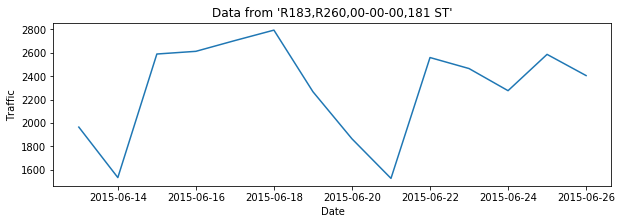

In [14]:
plt.figure(figsize=(10,3))
plt.plot(ds,cs)
plt.title("Data from 'R183,R260,00-00-00,181 ST'")
plt.xlabel('Date')
plt.ylabel('Traffic');

**Problem 5**

In [15]:
# dddd=defaultdict(list)
# for i in dd:
#     j=dd[i]
#     jdff = [int(j[k+1][1])-int(j[k][1]) for k in range(len(j)-1) ]
#     b    = [[j[k][0],jdff[k]] for k in range(len(jdff))]
#     c    = [[j[k][0].date(),b[k][1]] for k in range(len(b))]

#     a=0
#     while a < (len(c)-1):
        
#         while c[a][0]==c[a+1][0]:
#             #print(len(c)-2,a)
#             c[a][1]+=c[a+1][1]
#             del c[a+1]
#             if a==len(c)-1: break
#         a+=1
#     ddd[i]=c

In [16]:
#ddd[('R183','R260','00-00-00','181 ST')]
# dddd=defaultdict(int)
# for x in range(7):
#     for y in sorted([((i[0],i[1],i[3]),i[2]) for i in ddd.keys()],key=lambda x: x[0]):
#         dddd[(x,y[0])] = dddd[(x,y[0])] + ddd[(y[0][0],y[0][1],y[1],y[0][2])][0][1]

In [17]:
sorted([((i[0],i[1],i[3]),i[2]) for i in ddd.keys()],key=lambda x: x[0])[16][1]

'00-00-04'

In [18]:
ddd[('R183','R260','00-00-03','181 ST')]

[[datetime.date(2015, 6, 13), 1639],
 [datetime.date(2015, 6, 14), 1457],
 [datetime.date(2015, 6, 15), 2198],
 [datetime.date(2015, 6, 16), 2262],
 [datetime.date(2015, 6, 17), 2285],
 [datetime.date(2015, 6, 18), 2238],
 [datetime.date(2015, 6, 19), 2370],
 [datetime.date(2015, 6, 20), 1558],
 [datetime.date(2015, 6, 21), 1277],
 [datetime.date(2015, 6, 22), 2291],
 [datetime.date(2015, 6, 23), 2192],
 [datetime.date(2015, 6, 24), 2222],
 [datetime.date(2015, 6, 25), 2245],
 [datetime.date(2015, 6, 26), 2121]]

In [19]:
shrtkeys=[]
tnsls=[]
for i in ddd.keys():
    shrtkeys.append((i[0],i[1],i[3]))
    tnsls.append(i[2])
shrtkeys = set(shrtkeys)
tnsls = set(tnsls)

In [20]:
dddd=defaultdict(list)
for i in shrtkeys:
    for k in tnsls:
        if ddd[(i[0],i[1],k,i[2])]:
            #print dddd[i]
            if not dddd[i]:
                dddd[i]=ddd[(i[0],i[1],k,i[2])]
            else:
                for j in range(len(dddd[i])):#range(len(ddd[(i[0],i[1],k,i[2])])):
                    #print ddd[(i[0],i[1],k,i[2])]
                    try:
                        a=ddd[(i[0],i[1],k,i[2])][j][1]
                        dddd[i][j][1] += a
                    except: pass
    

In [21]:
dddd[('R183','R260','181 ST')]

[[datetime.date(2015, 6, 13), 8765],
 [datetime.date(2015, 6, 14), 7297],
 [datetime.date(2015, 6, 15), 11383],
 [datetime.date(2015, 6, 16), 11785],
 [datetime.date(2015, 6, 17), 12263],
 [datetime.date(2015, 6, 18), 12181],
 [datetime.date(2015, 6, 19), 12159],
 [datetime.date(2015, 6, 20), 8272],
 [datetime.date(2015, 6, 21), 6818],
 [datetime.date(2015, 6, 22), 11834],
 [datetime.date(2015, 6, 23), 11563],
 [datetime.date(2015, 6, 24), 12246],
 [datetime.date(2015, 6, 25), 11751],
 [datetime.date(2015, 6, 26), 10823]]

In [22]:
# #dddd=defaultdict(list)
# for i in ddd.keys():
#     j = ddd[i]
#     j.append([i[2]])
#    print j    
    #dddd[(i[0],i[1],i[3])] = j
#    a=0
#    while a < len(j)-1:
#
#        while j[a][0]==j[a+1][0]:
#
#            j[a][1]+=c[a+1][1]
#            del j[a+1]
#            if a==len(j)-1: break
#        a+=1
#    dddd[(i[0],i[1],i[3])] = j
#print ddd

In [23]:
# dddd=defaultdict(list)
# for i in ddd.keys():
#     j = list(ddd[i])
#     #print j
#     #dddd[(i[0],i[1],i[3])] = j
#     a=0
#     while a < len(j)-1:

#         while j[a][2]==j[a+1][2]:

#             j[a][1]+=j[a+1][1]
#             del j[a+1]
#             if a==len(j)-1: break
#         a+=1
#     dddd[(i[0],i[1],i[3])] = j

In [24]:
dddd[('R183','R260','181 ST')]

[[datetime.date(2015, 6, 13), 8765],
 [datetime.date(2015, 6, 14), 7297],
 [datetime.date(2015, 6, 15), 11383],
 [datetime.date(2015, 6, 16), 11785],
 [datetime.date(2015, 6, 17), 12263],
 [datetime.date(2015, 6, 18), 12181],
 [datetime.date(2015, 6, 19), 12159],
 [datetime.date(2015, 6, 20), 8272],
 [datetime.date(2015, 6, 21), 6818],
 [datetime.date(2015, 6, 22), 11834],
 [datetime.date(2015, 6, 23), 11563],
 [datetime.date(2015, 6, 24), 12246],
 [datetime.date(2015, 6, 25), 11751],
 [datetime.date(2015, 6, 26), 10823]]

**Problem 6**

In [25]:
exts=[]
sts=[]
for i in dddd.keys():
    exts.append((i[0],i[1]))
    sts.append(i[2])
sts = set(sts)
exts = set(exts)

In [26]:
ddddd=defaultdict(list)
for i in sts:
    for k in exts:
        if dddd[(k[0],k[1],i)]:
            #print dddd[i]
            if not ddddd[i]:
                ddddd[i]=dddd[(k[0],k[1],i)]
            else:
                for j in range(len(ddddd[i])):#range(len(dddd[(k[0],k[1],i)])):
                    a=dddd[(k[0],k[1],i)][j][1]
                    ddddd[i][j][1] += a

In [27]:
ddddd[('181 ST')]

[[datetime.date(2015, 6, 13), 16642],
 [datetime.date(2015, 6, 14), 13956],
 [datetime.date(2015, 6, 15), 22511],
 [datetime.date(2015, 6, 16), 23396],
 [datetime.date(2015, 6, 17), 24429],
 [datetime.date(2015, 6, 18), 24205],
 [datetime.date(2015, 6, 19), 24011],
 [datetime.date(2015, 6, 20), 15695],
 [datetime.date(2015, 6, 21), 13152],
 [datetime.date(2015, 6, 22), 23112],
 [datetime.date(2015, 6, 23), 23103],
 [datetime.date(2015, 6, 24), 23932],
 [datetime.date(2015, 6, 25), 23556],
 [datetime.date(2015, 6, 26), 22104]]

**Problem 7**

In [28]:
%matplotlib inline

a = ddddd[('181 ST')]
ds,cs = zip(*a)


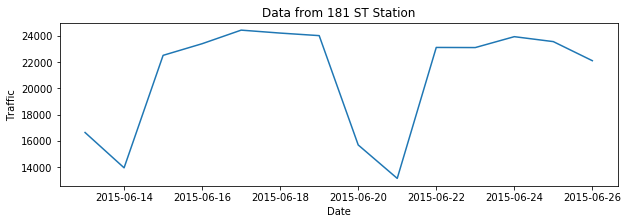

In [29]:
plt.figure(figsize=(10,3))
plt.plot(ds,cs)
plt.title("Data from 181 ST Station")
plt.xlabel('Date')
plt.ylabel('Traffic');

**Problem 8**

In [30]:
a=[0,1]

In [31]:
if datetime.date(2015, 6, 19) > datetime.date(2015, 6, 20): print 'oh well'

In [32]:
dddddd=defaultdict(list)

for i in ddddd:
    weeka=[]
    weekb=[]
    for j in ddddd[i]:
        #print i,j
        if j[0] <= datetime.date(2015, 6, 19):
            weeka.append(j)
        else: weekb.append(j)
    dddddd[i]=[weeka,weekb]

In [33]:
dddddd[('181 ST')]

[[[datetime.date(2015, 6, 13), 16642],
  [datetime.date(2015, 6, 14), 13956],
  [datetime.date(2015, 6, 15), 22511],
  [datetime.date(2015, 6, 16), 23396],
  [datetime.date(2015, 6, 17), 24429],
  [datetime.date(2015, 6, 18), 24205],
  [datetime.date(2015, 6, 19), 24011]],
 [[datetime.date(2015, 6, 20), 15695],
  [datetime.date(2015, 6, 21), 13152],
  [datetime.date(2015, 6, 22), 23112],
  [datetime.date(2015, 6, 23), 23103],
  [datetime.date(2015, 6, 24), 23932],
  [datetime.date(2015, 6, 25), 23556],
  [datetime.date(2015, 6, 26), 22104]]]

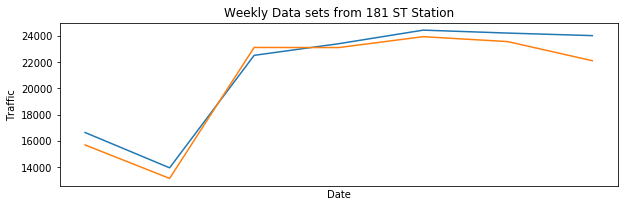

In [34]:
%matplotlib inline

a = dddddd[('181 ST')][0]
b = dddddd[('181 ST')][1]
dsa,csa = zip(*a)
dsb,csb = zip(*b)
dsbb = [i-datetime.timedelta(days=7) for i in dsb]

plt.figure(figsize=(10,3))
plt.plot(dsa,csa)
plt.plot(dsbb,csb)
plt.title("Weekly Data sets from 181 ST Station")
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.xticks([]);

**Problem 9**

In [35]:
#Go back to previous dict from before split weeka and weekb
#ddddd
ddddddd = {}
for i in ddddd:
    ds,cs = zip(*ddddd[i])
    ddddddd[i]=sum(cs)
    if sum(cs)<0:
        print sum(cs),i,'negative'
    if sum(cs)>3000000:
        print sum(cs),i,'huge'

-7275680 QUEENS PLAZA negative
117445516 BEACH 105 ST huge
-1207812468 72 ST negative
-8414771 103 ST-CORONA negative
-173609 233 ST negative
134260098 AVE N huge
-1467715 AVE H negative
-3237804 METROPOLITAN AV negative
-266409 THIRTY ST negative
-1225168 VAN WYCK BLVD negative
-199443 EXCHANGE PLACE negative
-1876882 UNION ST negative
-7609210 GATES AVE negative


In [36]:
statio=[]
coun=[]
for i in ddddddd:
    statio.append(i)
    coun.append(ddddddd[i])

**Problem 10**

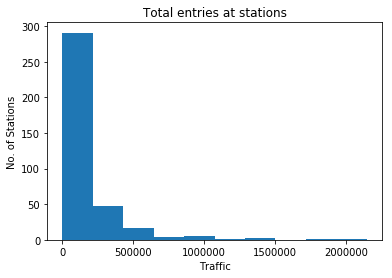

In [37]:
#plt.hist(coun) doesn't work cause of bad points:
goodcoun = [i for i in coun if 0<i<3000000] #remove bad points
plt.hist(goodcoun)
plt.title("Total entries at stations")
plt.xlabel('Traffic')
plt.ylabel('No. of Stations');